In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df.drop(0, inplace = True)
df.reset_index(inplace = True)
df.drop(columns='index' , inplace=True)

df['job_skills'] = df['job_skills'].apply(lambda skill_set: ast.literal_eval(skill_set) if pd.notna(skill_set) else skill_set)

In [2]:
data = {
    'job_title_short': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'job_skills': [['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]
}

df_skills = pd.DataFrame(data)
df_skills

,job_title_short,job_skills
0,Data Analyst,"[excel, sql, python]"
1,Data Scientist,"[python, r]"
2,Data Engineer,"[aws, python, airflow]"


If we wanted to analyze the skills in this we'd need a minimum of 5 lines of code to get the counts of skills.

In [3]:
df_skill_lists = df_skills.copy()

for row in df_skill_lists.itertuples():
    for skill in row.job_skills:
        df_skill_lists[skill] = df_skill_lists['job_skills'].apply(lambda x: skill in x)
        df_skill_lists[skill] = df_skill_lists[skill].astype(int)
        
df_skill_lists.loc['Total'] = df_skill_lists.sum()
    
df_skill_lists.iloc[:, 2:]

,excel,sql,python,r,aws,airflow
0,1,1,1,0,0,0
1,0,0,1,1,0,0
2,0,0,1,0,1,1
Total,1,1,3,1,1,1


In [4]:
df_exploded =df_skills.explode('job_skills')
df_exploded

,job_title_short,job_skills
0,Data Analyst,excel
0,Data Analyst,sql
0,Data Analyst,python
1,Data Scientist,python
1,Data Scientist,r
2,Data Engineer,aws
2,Data Engineer,python
2,Data Engineer,airflow


In [5]:
df_exploded.value_counts('job_skills')

job_skills
python     3
airflow    1
aws        1
excel      1
r          1
sql        1
Name: count, dtype: int64

<Axes: xlabel='job_skills'>

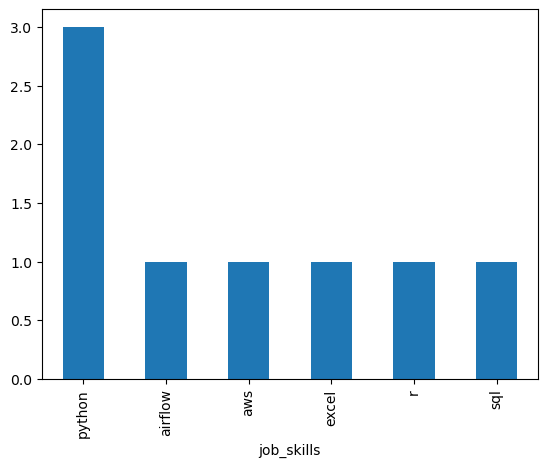

In [6]:
df_exploded.value_counts('job_skills').plot(kind = 'bar')

In [7]:
df[['job_title_short', 'job_skills']].head(5)

,job_title_short,job_skills
0,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
1,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
2,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
3,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."
4,Data Engineer,"[python, sql, gcp]"


In [8]:
df_exploded = df.explode('job_skills')

In [9]:
df_exploded['job_skills']

0                  r
0             python
0                sql
0              nosql
0           power bi
             ...    
785738         kafka
785738    kubernetes
785738        docker
785739           aws
785739          flow
Name: job_skills, Length: 3777319, dtype: object

<Axes: xlabel='job_skills'>

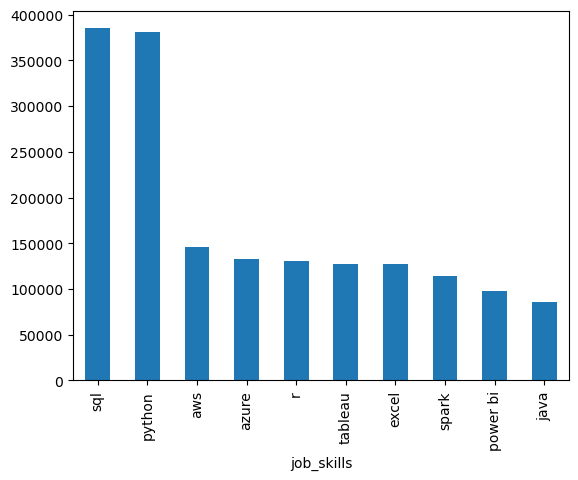

In [10]:
df_exploded.value_counts('job_skills').head(10).plot(kind = 'bar')

In [11]:
skills_count = df_exploded.groupby(['job_title_short','job_skills']).size()
skills_count

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

In [12]:
df_skills_count = skills_count.reset_index(name = 'skill_count')
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [14]:
job_title = 'Data Engineer'
top_skills = 10

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)
df_skill_final


,job_title_short,job_skills,skill_count
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
686,Data Engineer,aws,62049
687,Data Engineer,azure,60674
860,Data Engineer,spark,53656
763,Data Engineer,java,35559
770,Data Engineer,kafka,29073
755,Data Engineer,hadoop,28815
848,Data Engineer,scala,28716
712,Data Engineer,databricks,27477


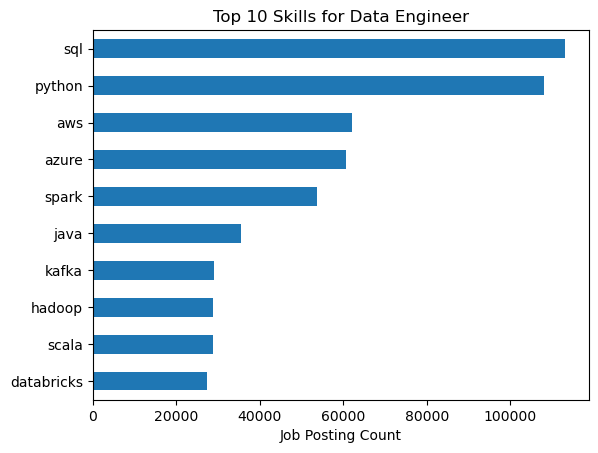

In [18]:
df_skill_final.plot(kind = 'barh', x = 'job_skills', y = 'skill_count')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} Skills for {job_title}')
plt.ylabel('')
plt.xlabel('Job Posting Count')
plt.legend().set_visible(False)
plt.show()